Preço de imóveis: prever o preço de venda de imóveis residenciais com base em características como área, número de quartos, idade do imóvel e localização.

In [ ]:
##criação do data frame

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
np.random.seed(42)
n = 1000

data = {
    "area_m2": np.random.normal(80, 20, n).clip(30, 200),
    "quartos": np.random.randint(1, 5, n),
    "banheiros": np.random.randint(1, 4, n),
    "idade_imovel": np.random.randint(0, 50, n),
    "distancia_centro_km": np.random.uniform(0.5, 30, n)
}

df = pd.DataFrame(data)

df["preco"] = (
    df["area_m2"] * 5000 +
    df["quartos"] * 20000 +
    df["banheiros"] * 15000 -
    df["idade_imovel"] * 1000 -
    df["distancia_centro_km"] * 3000 +
    np.random.normal(0, 20000, n)
)

df.to_csv("imoveis.csv", index=False)


In [ ]:
df

,area_m2,quartos,banheiros,idade_imovel,distancia_centro_km,preco
0,89.934283,3,3,44,18.592105,487338.963220
1,77.234714,4,1,46,19.311803,416261.000999
2,92.953771,1,1,11,7.639651,450388.230620
3,110.460597,4,3,20,21.564555,592619.320923
4,75.316933,3,3,10,3.196049,465922.604326
...,...,...,...,...,...,...
995,74.377994,4,3,8,9.229995,438581.980256
996,115.953731,1,3,26,20.082822,541496.923855
997,92.816857,4,1,25,28.976430,408950.756510
998,68.576420,1,2,18,1.987295,367223.823065


In [ ]:
df.head()

,area_m2,quartos,banheiros,idade_imovel,distancia_centro_km,preco
0,89.934283,3,3,44,18.592105,487338.963220
1,77.234714,4,1,46,19.311803,416261.000999
2,92.953771,1,1,11,7.639651,450388.230620
3,110.460597,4,3,20,21.564555,592619.320923
4,75.316933,3,3,10,3.196049,465922.604326


In [ ]:
df.shape

(1000, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   area_m2              1000 non-null   float64
 1   quartos              1000 non-null   int64  
 2   banheiros            1000 non-null   int64  
 3   idade_imovel         1000 non-null   int64  
 4   distancia_centro_km  1000 non-null   float64
 5   preco                1000 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 47.0 KB


In [ ]:
df.describe()

,area_m2,quartos,banheiros,idade_imovel,distancia_centro_km,preco
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,80.410818,2.473000,1.987000,24.325000,15.033921,412064.859638
std,19.515524,1.128958,0.823109,14.329295,8.470201,104311.049768
min,30.000000,1.000000,1.000000,0.000000,0.519275,100269.747157
25%,67.048194,1.000000,1.000000,12.000000,7.578093,338439.992566
50%,80.506012,2.000000,2.000000,24.000000,14.882720,411255.953373
75%,92.958878,4.000000,3.000000,36.000000,22.445955,480549.125205
max,157.054630,4.000000,3.000000,49.000000,29.986952,764274.930707


In [ ]:
X= df.drop("preco", axis=1)
y= df["preco"]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

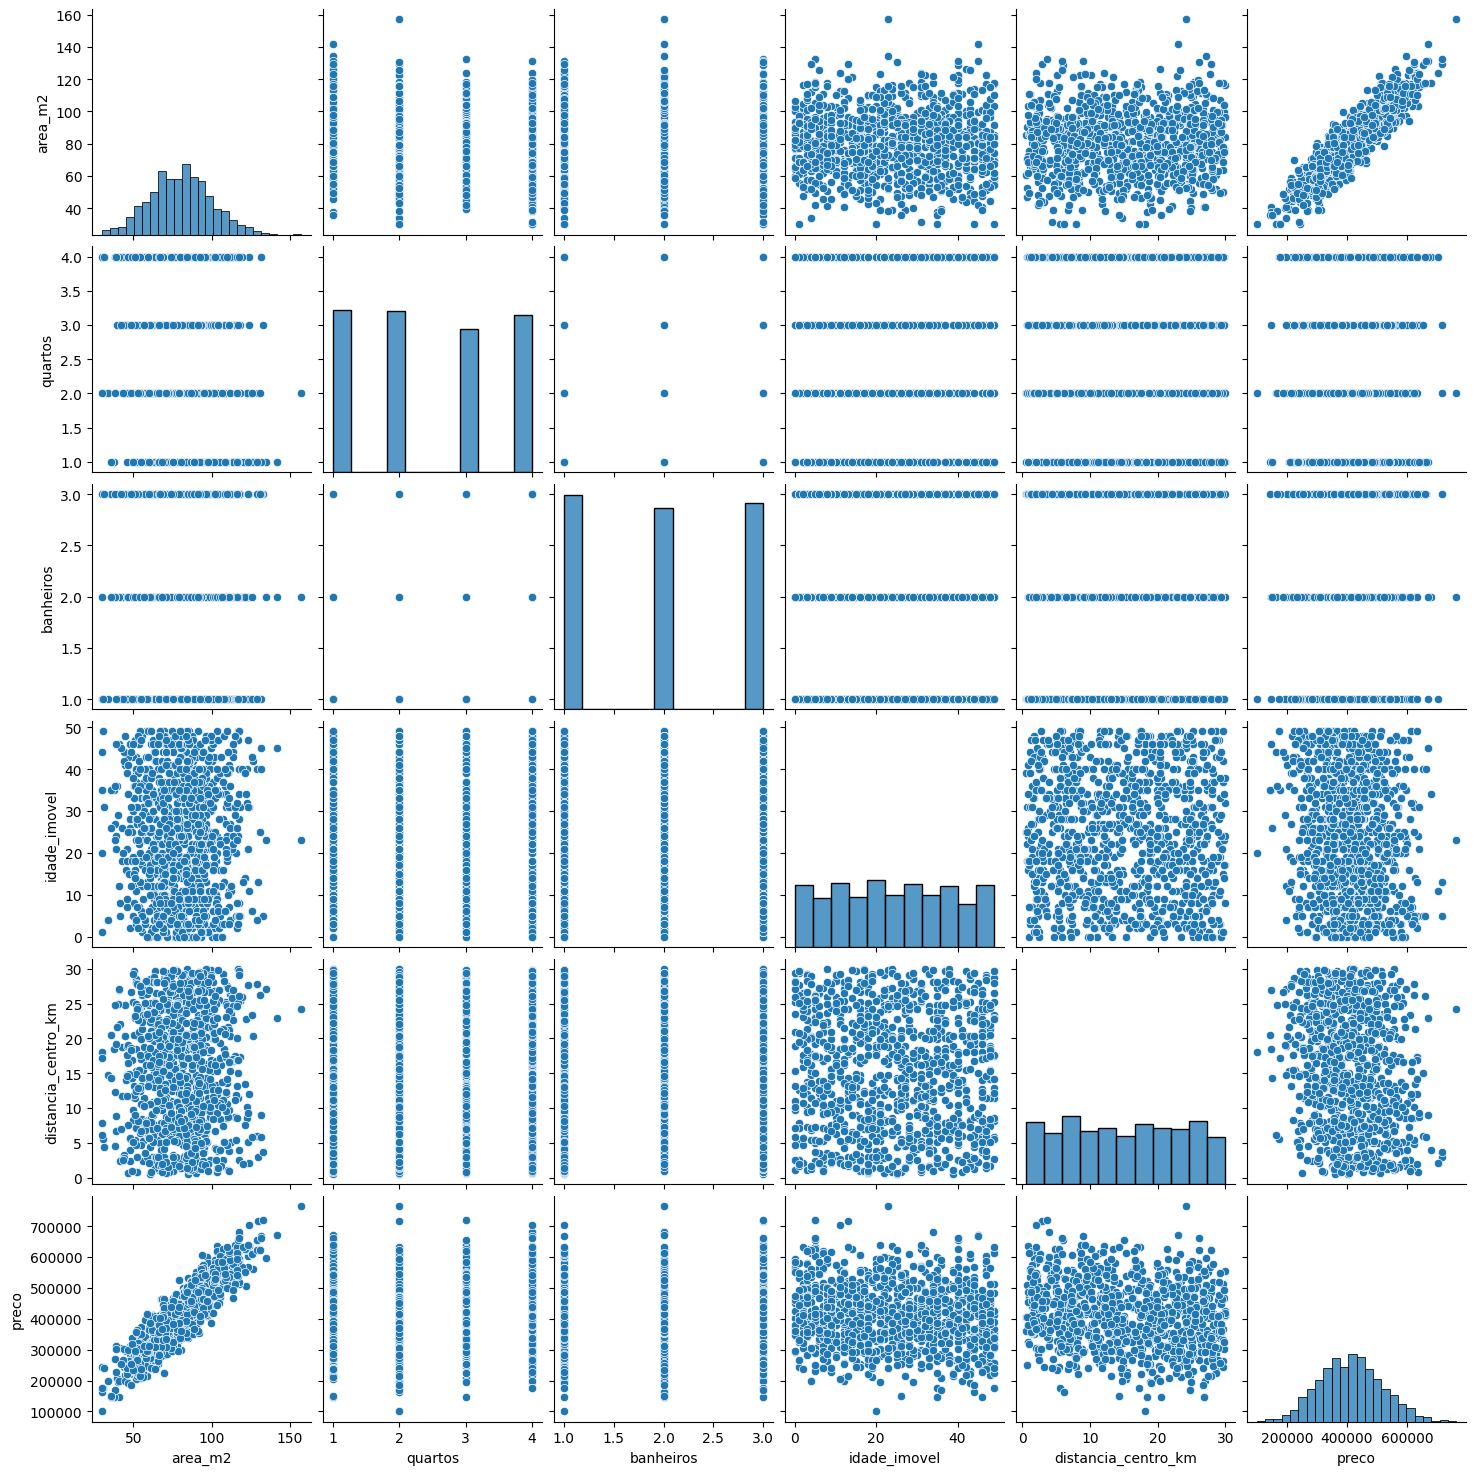

In [ ]:
sns.pairplot(df)
plt.show()

quanto maior a quantidade de quartos, banheiros e área, maior é o preço - a medida que a distância do centro aumenta e a idade do imóvel também, o preço  diminui.


# Separando treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

In [ ]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

In [ ]:
print("R2:", r2)
print("RMSE:", rmse)
print("MAE:", mae)

R2: 0.9589710957177989
RMSE: 20917.433804124477
MAE: 16896.374043558433


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso

In [ ]:
ridge_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Ridge())
])

lasso_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Lasso())
])

In [ ]:
ridge_pipeline.fit(X_train, y_train)
lasso_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', Lasso())])

In [ ]:
ridge_pred = ridge_pipeline.predict(X_test)
lasso_pred = lasso_pipeline.predict(X_test)

In [ ]:
r2_ridge = r2_score(y_test, ridge_pred)
r2_lasso = r2_score(y_test, lasso_pred)

In [ ]:
rmse_ridge = np.sqrt(mean_squared_error(y_test, ridge_pred))
rmse_lasso = np.sqrt(mean_squared_error(y_test, lasso_pred))

In [ ]:
mae_ridge = mean_absolute_error(y_test, ridge_pred)
mae_lasso = mean_absolute_error(y_test, lasso_pred)

In [ ]:
print("Ridge R2:", r2_ridge, "RMSE:", rmse_ridge, "MAE:", mae_ridge)
print("Lasso R2:", r2_lasso, "RMSE:", rmse_lasso, "MAE:", mae_lasso)

Ridge R2: 0.958992549673289 RMSE: 20911.96424088355 MAE: 16887.116552940002
Lasso R2: 0.9589716873237684 RMSE: 20917.28299674211 MAE: 16896.199057035894


In [ ]:
final_model = ridge_pipeline
final_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', Ridge())])

In [ ]:
import joblib

In [ ]:
joblib.dump(final_model, "modelo_preco_imovel.pkl")

['modelo_preco_imovel.pkl']